In [1]:
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
library(ggplot2)
library(ggpubr)


Warning message:
“package ‘plyr’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”

Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate




In [2]:
df<-read.csv("04_CD4_CXCR5_MFI/Baseline flow data - CD4+ CXCR5 MFI.csv")

In [3]:
df_BR1<-df[c("BR1")]
df_BR2<-df[c("BR2")]
colnames(df_BR1)<-"MFI"
colnames(df_BR2)<-"MFI"

In [4]:
df_BR1$`Age Group`="Young"
df_BR2$`Age Group`="Older"

In [5]:
df<-rbind(df_BR1,df_BR2)

In [6]:
df$`Age Group`<-factor(df$`Age Group`,levels=c("Young","Older"))

In [7]:
table(df$`Age Group`)


Young Older 
   16    16 

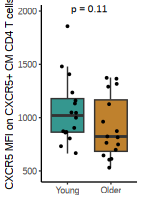

In [9]:
options(repr.plot.width = 30/25.4, repr.plot.height = 45/25.4)

p<-ggplot(df, aes(x=`Age Group`, y=MFI, fill=`Age Group`)) +
    geom_boxplot(outlier.shape = NA,lwd=0.3) +
geom_point(position = position_jitter(width = 0.2),color="black", size=0.8,stroke=0) +
theme_classic(base_size=6)+  
stat_compare_means(aes(label = paste0("p = ", after_stat(p.format))),
    size=2,
    label.x=1.25,  
    vjust = -2)+theme(strip.background = element_rect(linewidth = 0))+
    scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f'))+
    scale_y_continuous(limits = c(NA, NA), 
                       expand = expansion(mult = c(0.1, 0.15)))+
theme(legend.position="none")+
xlab('')+
ylab('CXCR5 MFI on CXCR5+ CM CD4 T cells')


p
ggsave('FigureE.pdf',p,width = 30/25.4,height = 45/25.4)